In [1]:
# create the configuration of the low-fidelity model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

from mfbml.methods.dnn_bnn import DNNBNN
# fix the random seed for reproducibility
seed = 1999
np.random.seed(seed)
torch.manual_seed(seed)

In [2]:
# read the data
data = pd.read_pickle("../data_generation/data.pkl")
# extract dataset
samples = data["samples"]
hf_samples = samples[0]
lf_samples = samples[1]
hf_responses = data["responses_lf1"][0]
responses_lf1 = data["responses_lf1"]
responses_lf2 = data["responses_lf2"]
responses_lf3 = data["responses_lf3"]
test_samples = data["test_samples"]
test_hf_responses_noiseless = data["test_hf_responses_noiseless"]
test_hf_responses = data["test_hf_responses"]
test_lf1_responses = data["test_lf1_responses"]
test_lf2_responses = data["test_lf2_responses"]
test_lf3_responses = data["test_lf3_responses"]

In [3]:
# create the configuration of the low-fidelity model
lf_configure = {
    "in_features": 1,
    "hidden_features": [50, 50],
    "out_features": 1,
    "activation": "Tanh",
    "optimizer": "Adam",
    "lr": 0.001,
    "weight_decay": 0.000001,
    "loss": "mse",
}
# create the configuration of the high-fidelity model
hf_sequential_configure = {
    "in_features": 2,
    "hidden_features": [50, 50],
    "out_features": 1,
    "activation": "Tanh",
    "lr": 0.001,
    "sigma": 0.05,
}

# lf train config
lf_train_config = {
    "batch_size": None,
    "num_epochs": 10000,
    "print_iter": 100,
    "data_split": False,
}
hf_train_config = {
    "num_epochs": 30000,
    "sample_freq": 100,
    "print_info": True,
    "burn_in_epochs": 20000,
}

In [4]:
# create the MFDNNBNN object

lf_responses = [responses_lf1, responses_lf2, responses_lf3]

for ii, lf_responses in enumerate(lf_responses):
    model = DNNBNN(
        design_space=torch.Tensor([[0, 1]]),
        lf_configure=lf_configure,
        hf_configure=hf_sequential_configure,
    )

    model.train(
        X=samples,
        Y=lf_responses,
        lf_train_config=lf_train_config,
        hf_train_config=hf_train_config,
    )
    # save the model to the disk
    with open(f"smf_bnn_lf_{ii+1}_50.pkl", "wb") as f:
        torch.save(model, f)


No data split: use all data for training
epoch:  100 train loss:  0.9584434628486633
epoch:  200 train loss:  0.9574099183082581
epoch:  300 train loss:  0.9541925191879272
epoch:  400 train loss:  0.9133689403533936
epoch:  500 train loss:  0.8132301568984985
epoch:  600 train loss:  0.5626590251922607
epoch:  700 train loss:  0.3776785731315613
epoch:  800 train loss:  0.04032806679606438
epoch:  900 train loss:  0.013216248713433743
epoch:  1000 train loss:  0.007699227891862392
epoch:  1100 train loss:  0.005666605196893215
epoch:  1200 train loss:  0.004781221970915794
epoch:  1300 train loss:  0.004410793073475361
epoch:  1400 train loss:  0.004216312896460295
epoch:  1500 train loss:  0.004094907082617283
epoch:  1600 train loss:  0.00401014881208539
epoch:  1700 train loss:  0.003944453317672014
epoch:  1800 train loss:  0.0038895702455192804
epoch:  1900 train loss:  0.0038439342752099037
epoch:  2000 train loss:  0.0038075526244938374
epoch:  2100 train loss:  0.0037721858825

/home/yaga/Documents/GitHub/mfbml/src/mfbml/inference/psgld.py:108: UserWarning: This overload of addcmul_ is deprecated:
	addcmul_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcmul_(Tensor tensor1, Tensor tensor2, *, Number value) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1485.)
  V.mul_(alpha).addcmul_(1 - alpha, d_p, d_p)


epoch:   100/30000
nll_loss: 6.716, prior_loss: 2688.012, total: 2694.728
noise: 0.127
epoch:   200/30000
nll_loss: 0.142, prior_loss: 2773.159, total: 2773.301
noise: 0.127
epoch:   300/30000
nll_loss: -6.851, prior_loss: 2849.480, total: 2842.628
noise: 0.127
epoch:   400/30000
nll_loss: -2.328, prior_loss: 2946.083, total: 2943.754
noise: 0.127
epoch:   500/30000
nll_loss: -6.896, prior_loss: 3045.726, total: 3038.830
noise: 0.127
epoch:   600/30000
nll_loss: -6.346, prior_loss: 3115.616, total: 3109.270
noise: 0.127
epoch:   700/30000
nll_loss: -7.206, prior_loss: 3173.460, total: 3166.254
noise: 0.127
epoch:   800/30000
nll_loss: -9.443, prior_loss: 3231.282, total: 3221.839
noise: 0.127
epoch:   900/30000
nll_loss: -2.377, prior_loss: 3289.805, total: 3287.428
noise: 0.127
epoch:  1000/30000
nll_loss: -8.822, prior_loss: 3340.927, total: 3332.105
noise: 0.127
epoch:  1100/30000
nll_loss: -7.594, prior_loss: 3390.975, total: 3383.381
noise: 0.127
epoch:  1200/30000
nll_loss: -10.4

KeyboardInterrupt: 

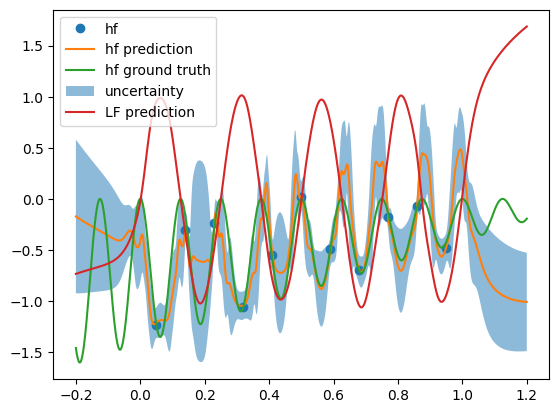

In [7]:
# load model (lf1 for example)
with open("smf_bnn_lf_1_50.pkl", "rb") as f:
    model = torch.load(f)
# visualize the posterior of sequential mf-bnn
(
    smf_bnn_lf1_hy,
    smf_bnn_lf1_epistemic,
    smf_bnn_lf1_total_unc,
    smf_bnn_lf1_aleatoric,
) = model.predict(X=test_samples)
# get lf predictions
smf_bnn_lf1_y = model.predict_lf(X=test_samples, output_format="numpy")
# plot
fig, ax = plt.subplots()
ax.plot(hf_samples, hf_responses, "o", label="hf")
ax.plot(test_samples.numpy(), smf_bnn_lf1_hy, label="hf prediction")
ax.plot(
    test_samples.numpy(),
    test_hf_responses_noiseless.numpy(),
    label="hf ground truth",
)
ax.fill_between(
    test_samples.flatten().numpy(),
    (smf_bnn_lf1_hy - 2 * smf_bnn_lf1_total_unc).reshape(-1),
    (smf_bnn_lf1_hy + 2 * smf_bnn_lf1_total_unc).reshape(-1),
    alpha=0.5,
    label="uncertainty",
)

# plot lf samples
# ax.scatter(lf_samples, lf1_responses, label="LF samples")
ax.plot(
    test_samples.numpy(),
    smf_bnn_lf1_y,
    label="LF prediction"
)
ax.legend()
plt.show()